<a href="https://colab.research.google.com/github/Karthicksaga/Advanced-Regression/blob/master/Flower_Recogonition_Problem_Statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libray
import numpy as np  # for scientific Calculation
import pandas as pd # perform dataframe Operation
import matplotlib.pyplot as plt #plot visualization
import tensorflow as tf
import zipfile
import os
import datetime
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthicktj","key":"6211770f9151c6e602003452c6ba6f03"}'}

In [ ]:
#Fetch data using kaggle and Extract it
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition

 94% 211M/225M [00:01<00:00, 145MB/s]
100% 225M/225M [00:01<00:00, 154MB/s]


In [ ]:
#extract the zipfile
flower_dataset_path = os.path.join(os.getcwd(),'flowers-recognition.zip')

flower_data = zipfile.ZipFile(flower_dataset_path,'r')
#Specify the path Where to extract the data
flower_data.extractall("Flower_Recoginition")
# After Extracting Close the Zip File
flower_data.close()
#Now our Dataset is Ready 

In [ ]:
print(os.getcwd())

/content


In [ ]:
#list what are the directory are present in the current working Directory

print(os.listdir(os.getcwd()))

['.config', 'Flower_Recoginition', 'flowers-recognition.zip', 'kaggle.json', 'sample_data']


In [ ]:
#flower_regonition Folder - open the folder and perform Analysis Operation
if  'Flower_Recoginition' in os.listdir(os.getcwd()):
  flower_dataset = os.path.join(os.getcwd(),'Flower_Recoginition')
else:
  print("Cannot find the path")

In [ ]:
print(type(flower_dataset))
print(flower_dataset)

<class 'str'>
/content/Flower_Recoginition


In [ ]:
#In this flower_dataset we have a subfolder flowers inside the flowers subfolder have flower Images and the class Label
flower_path = os.path.join(flower_dataset,os.listdir(flower_dataset)[0])
#list how many class label present in the dataset 
print("Class Labels in the dataset : {0}".format(os.listdir(flower_path)))

Class Labels in the dataset : ['sunflower', 'rose', 'daisy', 'dandelion', 'tulip']


In [ ]:
#we have Five Class in the dataset, Let's see how many flowers in each Class
def flower_count(base_path):
  
  """
    basepath - flower Folder path
    return - dict {class_label :count(image)}

  """
  flower_classes = os.listdir(base_path)

  class_count = dict()
  for class_label in flower_classes:
    #Join the Current Flower path and counting length of class label
    class_count[class_label] = len(os.listdir(os.path.join(base_path , class_label)))

  return class_count 

class_count = flower_count(flower_path)  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


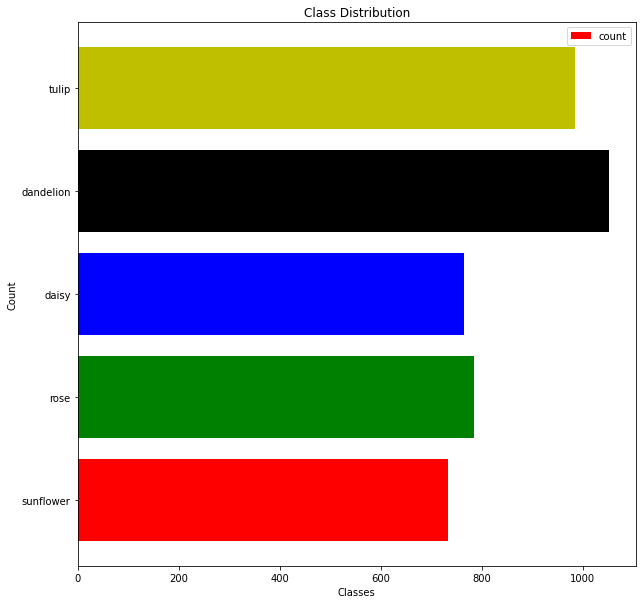

In [ ]:
#Reference/Credits: https://towardsdatascience.com/mastering-the-bar-plot-in-python-4c987b459053
#Let's see Howmany classes in each label
#Each Class Values 
class_count_values = list(class_count.values())
class_label = list(class_count.keys())
plt.figure(figsize = (10,10))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.barh(class_label, class_count_values, align='center',color='rgbky')

# Creating the legend of the bars in the plot
plt.legend(labels = ['count'])
# Giving the tilte for the plot
plt.title("Class Distribution")
# Namimg the x and y axis
plt.xlabel('Classes')
plt.ylabel('Count')
# Saving the plot as a 'png'
plt.savefig('1BarPlot.png')
# Displaying the bar plot
plt.show()

In [ ]:
class_label

['sunflower', 'rose', 'daisy', 'dandelion', 'tulip']

In [ ]:
#lets's see the percentage of Each class label
class_count_values = np.array(class_count_values)
class_label = np.array(class_label)
total_flower = np.sum(class_count_values)
print("...Total No of Flowers :{0}.....".format(np.sum(class_count_values)))

for i in range(len(class_label)):
  print("{0} Flower  is distributed as percentage : {1}".format(class_label[i],(class_count_values[i]/total_flower) * 100))


...Total No of Flowers :4317.....
sunflower Flower  is distributed as percentage : 16.979383831364373
rose Flower  is distributed as percentage : 18.160759786889045
daisy Flower  is distributed as percentage : 17.697475098447995
dandelion Flower  is distributed as percentage : 24.368774611999072
tulip Flower  is distributed as percentage : 22.793606671299514


# Construct Dataset

In [ ]:
#initialize x and y to add the image as numpy
#x = np.zeros_like((len(class_count_values)))
#y = np.zeros_like(len(class_count_values))
import tqdm
import cv2


def data_preparation(base_dir,flower_type,target_image_size):
  
  """
    base_dir - Image Base directory 
    flower_type - class label Eg: tulip
    target_image_size - resize of the image 
    return -  converted image array and class label
  """
  #initalize x and y to st
  x,y = [],[]
  class_path = os.path.join(base_dir,flower_type)
  
  for image in tqdm.tqdm(os.listdir(class_path)):
    
    image_path = os.path.join(class_path,image)
    #read the image #cv2.IMREAD_color for RGB image
    img = cv2.imread(image_path,cv2.IMREAD_COLOR)
    #resize the image
    img = cv2.resize(img, (target_image_size,target_image_size))

    x.append(np.array(img))
    
    y.append(str(flower_type))

  return(x,y)

In [ ]:
X_data,y_data = [],[]
#base_path is a flower dataset
print("Flower Path : {0}".format(flower_path))
for label in class_label:
  print("Flower Label :{0}".format(label))
  x,y = data_preparation(flower_path,label,224)
  X_data.extend(x)
  y_data.extend(y)  
X_data = np.array(X_data)
y_data = np.array(y_data)

Flower Path : /content/Flower_Recoginition/flowers
Flower Label :sunflower


100%|██████████| 733/733 [00:02<00:00, 330.95it/s]


Flower Label :rose


100%|██████████| 784/784 [00:01<00:00, 412.39it/s]


Flower Label :daisy


100%|██████████| 764/764 [00:01<00:00, 391.02it/s]


Flower Label :dandelion


100%|██████████| 1052/1052 [00:02<00:00, 394.46it/s]


Flower Label :tulip


100%|██████████| 984/984 [00:02<00:00, 383.83it/s]


In [ ]:
print(type(X_data))

<class 'numpy.ndarray'>


In [ ]:
print("Total No of Data : {0}".format(len(X_data)))
print("Shape of the image : {0}",format(X_data[0].shape))

Total No of Data : 4317
Shape of the image : {0} (225, 225, 3)


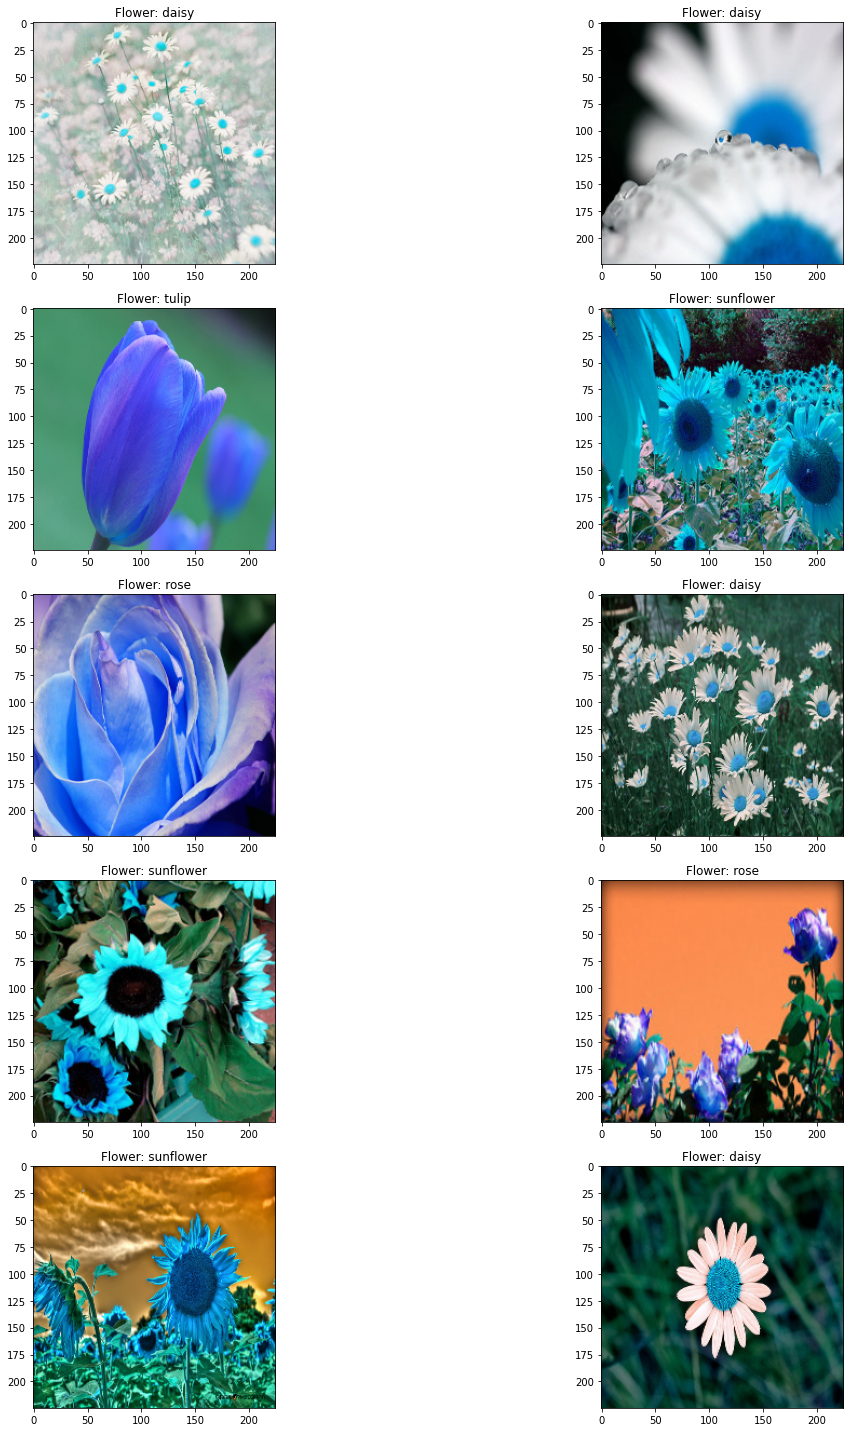

In [ ]:
import random as rn

#plot the image Randomly

def plot_image(row,column,inches,x_data,y_data):
  
  fig,ax=plt.subplots(row,column)
  fig.set_size_inches(inches,inches)

  for i in range(row):
      for j in range (column):
          l=rn.randint(0,len(y_data))
          ax[i,j].imshow(x_data[l])
          ax[i,j].set_title('Flower: '+y_data[l])
    
  plt.tight_layout()
row,column = 5,2
inches = 20
plot_image(row,column,inches,X_data,y_data)

# Train Test Split

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#normalize the data all data lies in the 0 to 1

y_data = LabelEncoder().fit_transform(y_data)
y_data = tf.keras.utils.to_categorical(y_data ,5)


In [ ]:
print(y_data.shape)

(4317, 5)


In [ ]:
from sklearn.model_selection import train_test_split
# split the Data into train and test 
x_train,x_test,y_train,y_test = train_test_split(X_data,y_data,random_state = 42, test_size = 0.1)
print("Training Shape Of the Dataset : {0}".format(x_train.shape))
print("Test Shape Of the Dataset: {0}".format(x_test.shape))

Training Shape Of the Dataset : (3885, 225, 225, 3)
Test Shape Of the Dataset: (432, 225, 225, 3)


In [ ]:
from sklearn.metrics import f1_score
class CallBackF1Score(tf.keras.callbacks.Callback):

  #call the Callback class
  def __init__(self,train_data,validation_data):
    super(CallBackF1Score,self).__init__()

    self.training_data = training_data
    self.validation_data = validation_data


  #compute the f1Score in end of the epoch
  def on_epoch_end(self,epoch,logs = {}):

    x_train = self.training_data[0]
    y_train = self.training_data[1]


    x_test = self.validation_data[0]
    y_test = self.validation_data[1]

    train_proba = self.model.predict(x_train)
    train_pred = np.argmax(train_proba,axis = 1)
    y_train_true = np.argmax(y_train,axis = 1)
    train_f1_score = f1_score(y_train_true,train_pred,average = 'micro')
    logs['train_f1_score'] = train_f1_score 


    y_test_true = np.argmax(y_test, axis = 1)
    test_proba = self.model.predict(x_test)
    test_pred = np.argmax(test_proba,axis = 1)
    test_f1_score = f1_score(y_test_true,test_pred)
    logs['test_f1_score'] = test_f1_score
    
f1_callback = CallBackF1Score((x_train,y_train),(x_test,y_test))
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience= 3,restore_best_weights= True)
learning_rate_Callback = tf.keras.callbacks.ReduceLROnPlateau()
call_backs = [f1_callback,early_stopping_callback,learning_rate_Callback]

In [ ]:
  #preprocess the image scaling
  #Reference : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                featurewise_center=False,  # set input mean to 0 over the dataset
                samplewise_center=False,  # set each sample mean to 0
                featurewise_std_normalization=False,  # divide inputs by std of the dataset
                samplewise_std_normalization=False,  # divide each input by its std
                zca_whitening=False,  # apply ZCA whitening
                rotation_range=40,  # randomly rotate images in the range (degrees, 0 to 180)
                zoom_range = 0.2, # Randomly zoom image 
                width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                horizontal_flip=True,  # randomly flip images
                vertical_flip=True) 
train_gen.flow(x_train)


In [ ]:
tf.keras.backend.clear_session()
image_size  = (224,224,3)
vgg = tf.keras.applications.VGG16(include_top = False , weights='imagenet',input_shape= (224,224,3))
vgg.trainable = False
input_layer = tf.keras.layers.Input(shape = (224,224,3))
vgg_layer = vgg(input_layer)
layer1 = tf.keras.layers.Conv2D(128,kernel_size = (3,3),padding ='valid',strides = (1,1),kernel_initializer=tf.keras.initializers.he_normal(seed = 3),activation = tf.nn.relu,data_format = 'channels_last',name = 'layer1')(vgg_layer)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(layer1)

flatten = tf.keras.layers.Flatten(data_format='channels_last',name='Flatten')(pool)
#FC layer
FC1 = tf.keras.layers.Dense(units=256,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=32),name='FC1')(flatten)

#FC layer
FC2 = tf.keras.layers.Dense(units=128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=33),name='FC2')(FC1)

#output layer
Out = tf.keras.layers.Dense(units=5,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(FC2)

#log_dir="vgg_mode_1" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
tf.keras.backend.clear_session()
#Creating a model
model = tf.keras.models.Model(inputs=input_layer,outputs=Out)



model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])